In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import optimize, signal, integrate
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
R = 8.31446261815324  # J/mol.K
T0 = 292.05           # K
p0 = 101600           # Pa
V = 190e-3            # L of isopropanol
m = 2.7677            # g of Raney Nickel
rho = 785             # kg/m³ or g/L
M = 60.1              # g/mol
n0 = rho*V/M          # mol

In [3]:
n0

2.4816971713810316

In [4]:
k = 8.765e-6
b = 8.901e5
a = 1.234e4

In [5]:
def model(x, k, a, b, n0=n0):
    return k*(a*(n0 - x))/(1 + a*(n0 - x) + b*x)

In [6]:
def ode(t, x, k, a, b, n0):
    return np.array([
        model(x, k, a, b, n0)
    ])

In [7]:
t = np.linspace(0, 10000, 1001)

In [8]:
sol = integrate.solve_ivp(ode, [t.min(), t.max()], y0=[0], args=(k, a, b, n0), t_eval=t)

In [9]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+01 ...  9.990e+03  1.000e+04]
        y: [[ 0.000e+00  8.754e-05 ...  5.029e-02  5.033e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 62
     njev: 0
      nlu: 0

In [10]:
xi = sol.y[0,:]

In [11]:
r = ode(t, xi, k, a, b, n0).squeeze()

In [12]:
A = (n0 - xi)/V
B = xi/V

In [13]:
data = pd.DataFrame({"t": t, "xi": xi, "r": r, "A": A, "B": B})

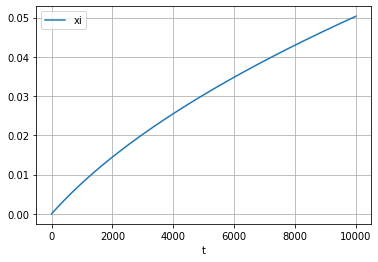

In [14]:
axe = data.plot(x="t", y="xi")
axe.grid()

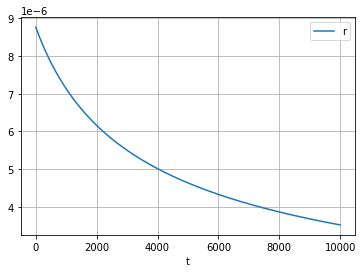

In [15]:
axe = data.plot(x="t", y="r")
axe.grid()

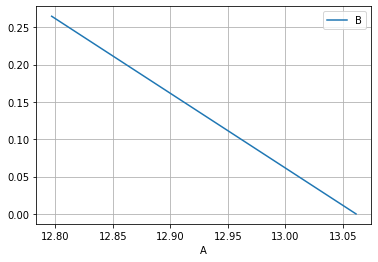

In [16]:
axe = data.plot(x="A", y="B")
axe.grid()

In [17]:
optimize.curve_fit(model, xi, r, p0=[1, 1, 1])

(array([ 7.92731975e-06, -4.21753879e+00, -2.75545260e+02]),
 array([[ 7.55559983e-32, -3.80538123e-25, -2.74478183e-23],
        [-3.80538123e-25,  1.91658196e-18,  1.38241060e-16],
        [-2.74478183e-23,  1.38241060e-16,  9.97118360e-15]]))

In [18]:
def model2(C, k, a, b):
    return k*(a*C[0])/(1 + a*C[0] + b*C[1])

In [19]:
Alin = np.linspace(1e-2, 1.2e4, 100)
Blin = np.linspace(1e-2, 2.4e2, 100)

In [20]:
A, B = np.meshgrid(Alin, Blin)

In [21]:
rAB = model2([A, B], k, a, b)

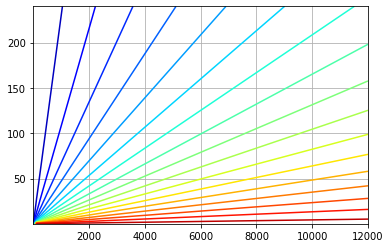

In [22]:
fig, axe = plt.subplots()
axe.contour(A, B, rAB, 20, cmap="jet")
axe.grid()

In [23]:
C = np.stack([A.ravel(), B.ravel()])

In [24]:
optimize.curve_fit(model2, C, rAB.ravel())

(array([8.765e-06, 1.234e+04, 8.901e+05]),
 array([[ 5.54518939e-46, -1.86916552e-30, -1.34825186e-28],
        [-1.86916552e-30,  2.05753802e-13,  1.48412851e-11],
        [-1.34825186e-28,  1.48412851e-11,  1.07052088e-09]]))

In [25]:
popt, pcov = optimize.curve_fit(model2, data[["A", "B"]].values.T, data["r"].values)
popt, pcov

(array([8.86479322e-06, 6.70498393e+00, 4.89069172e+02]),
 array([[ 2.07770349e-33, -1.39199142e-25, -1.00402891e-23],
        [-1.39199142e-25,  9.32587407e-18,  6.72665581e-16],
        [-1.00402891e-23,  6.72665581e-16,  4.85186676e-14]]))

In [26]:
popt[2]/popt[1]

72.94114004306607